# Statystyka matematyczna - ćwiczenia laboratoryjne

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

---

# Zestaw zadań 1: Rozkłady zmiennych losowych dyskretnych

In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [7]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [8]:
def vizualize_discrete_distribution(pmf, cdf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca indeks z wariantami zmiennej losowej i nadaną nazwą (np. x) oraz pojedynczą kolumnę
        z prawdopodobieństwami poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. P(X=x)).
    cdf: pandas.DataFrame
        Tablica zawierająca index w formacie pandas.IntervalIndex z przedziałami wartości zmiennej losowej i nadaną nazwą (np. x)
        oraz pojedynczą kolumnę wartościami dystrybuanty dla poszczególnych przedziałów o nadanej nazwie bazującej na nazwie zmiennej (np. F(x)).
    mask: numpy.ndarray
        Macierz logiczna 1D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """

    pmf_name = pmf.columns[0]
    pmf_plot = pmf.copy(deep=True)
    
    cdf_name = cdf.columns[0]
    cdf_index = cdf.index.copy(deep=True)
    cdf_index_range = cdf.index[-1].left - cdf.index[0].right
    cdf_index.values[0] = pd.Interval(cdf.index[0].right - 0.1*cdf_index_range, cdf.index[0].right, closed=cdf.index.closed)
    cdf_index.values[-1] = pd.Interval(cdf.index[-1].left, cdf.index[-1].left + 0.1*cdf_index_range, closed=cdf.index.closed)
    cdf_plot = pd.DataFrame(data=cdf.values, index=cdf_index, columns=[cdf_name])
    cdf_plot.index.name = cdf.index.name
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta zmiennej losowej dyskretnej")

    if mask is None:
        axes[0].scatter(pmf.index, pmf_plot[pmf_name], color="blue")
        axes[0].vlines(pmf.index, 0, pmf_plot[pmf_name], color="blue")
    else:
        axes[0].scatter(pmf.index[~mask], pmf_plot[pmf_name][~mask], color="red")
        axes[0].scatter(pmf.index[mask], pmf_plot[pmf_name][mask], color="green")
        axes[0].vlines(pmf.index[~mask], 0, pmf_plot[pmf_name][~mask], color="red")
        axes[0].vlines(pmf.index[mask], 0, pmf_plot[pmf_name][mask], color="green")
    axes[0].set_title("Rozkład prawdopodobieństwa")
    axes[0].set_xlabel(pmf_plot.index.name)
    axes[0].set_ylabel(pmf_name)

    axes[1].hlines(cdf_plot[cdf_name], cdf_plot.index.left, cdf_plot.index.right, color="grey")
    axes[1].scatter(cdf_plot.index.left[1:], cdf_plot[cdf_name][1:], color="grey")
    axes[1].scatter(cdf_plot.index.right[:-1], cdf_plot[cdf_name][:-1], color='white', edgecolor="grey")
    axes[1].set_title("Dystrybuanta")
    axes[1].set_xlabel(cdf_plot.index.name)
    axes[1].set_ylabel(cdf_name)

### Zadanie 1: Przykładowy dyskretny rozkład prawdopodobieństwa [10 pkt]
Zmienna losowa X ma funkcję rozkładu prawdopodobieństwa daną wzorem:

$$P(X=x) = \begin{cases}
0.1\text{ dla }x=1\\
0.05\text{ dla }x=3\\
0.15\text{ dla }x=5\\
0.25\text{ dla }x=7\\
0.2\text{ dla }x=9\\
0.15\text{ dla }x=11\\
0.1\text{ dla }x=13\\
\end{cases}$$

#### a) Funkcja rozkładu prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej X w formie tablicy `r1p` o następującej strukturze:

> Indeks:</br>
> x - warianty przyjmowane przez zmienną X.</br>

> Kolumny:</br>
> P(X=x) - prawdopodobieństwo poszczególnych wariantów.

In [13]:
r_variants = np.array([1,3,5,7,9,11,13])
r_probabilities = np.array([0.1,0.05,0.15,0.25,0.2,0.15,0.1])
r1p = pd.DataFrame(data=r_probabilities, index=r_variants, columns=["P(X=x)"])
r1p.index.name = 'x'
r1p

,P(X=x)
x,
1,0.10
3,0.05
5,0.15
7,0.25
9,0.20
11,0.15
13,0.10


In [14]:
# Komórka testowa
assert type(r1p) == pd.DataFrame
assert r1p.shape == (7, 1)
assert list(r1p.columns) == ["P(X=x)"]
assert r1p.index.name == "x"
assert np.isclose(np.sum(r1p.index.values), 49)
assert np.isclose(np.sum(r1p["P(X=x)"]), 1)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej X w formie tablicy `r1f` o następującej strukturze:

> Indeks:</br>
> x - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(x) -wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.

In [15]:
breaks = np.hstack([-np.inf, r1p.index, np.inf])
breaks
r_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r_intervals
r_cumulative_probabilities = np.cumsum(r1p["P(X=x)"].values)
r_cumulative_probabilities
r_cumulative_probabilities = np.hstack([0, r_cumulative_probabilities])
r_cumulative_probabilities
r1f = pd.DataFrame(data=r_cumulative_probabilities, index=r_intervals, columns=["F(x)"])
r1f.index.name='x'
r1f


,F(x)
x,
"[-inf, 1.0)",0.00
"[1.0, 3.0)",0.10
"[3.0, 5.0)",0.15
"[5.0, 7.0)",0.30
"[7.0, 9.0)",0.55
"[9.0, 11.0)",0.75
"[11.0, 13.0)",0.90
"[13.0, inf)",1.00


In [16]:
# Komórka testowa
assert type(r1f) == pd.DataFrame
assert r1f.shape == (8, 1)
assert list(r1f.columns) == ["F(x)"]
assert r1f.index.name == "x"
assert type(r1f.index) == pd.core.indexes.interval.IntervalIndex
assert r1f.index.closed == 'left'
assert np.isclose(r1f["F(x)"].min(), 0.0)
assert np.isclose(r1f["F(x)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej X w formie wykresów.

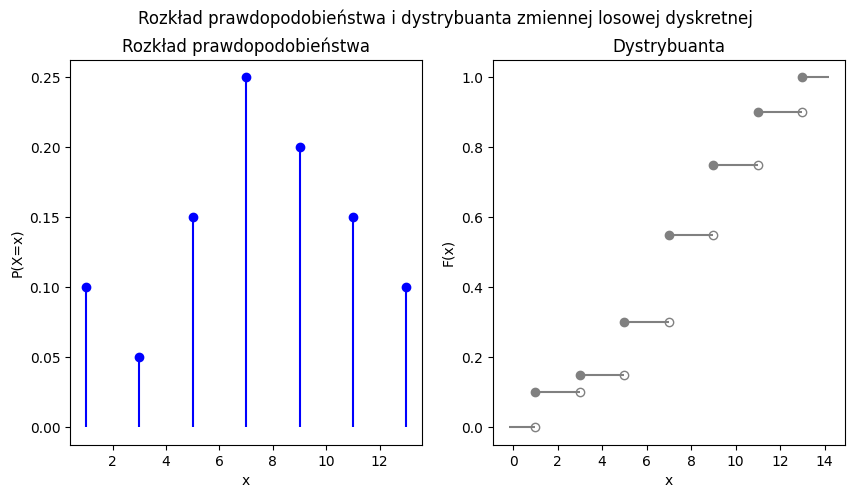

In [17]:
vizualize_discrete_distribution(r1p, r1f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej X - wartość średnia (`r1_mean`), wariancja (`r1_var`) i odchylenie standardowe (`r1_std`).

In [18]:
values = r1p.index.values
probabilities = r1p["P(X=x)"].values
r1_mean = np.sum(values * probabilities)

In [19]:
r1_var = np.sum(((values - r1_mean) ** 2) * probabilities)

In [20]:
r1_std = np.sqrt(r1_var)

In [21]:
# Komórka testowa
assert np.isclose(r1_mean, 7.499999999999999)
assert np.isclose(r1_var, 11.55)
assert np.isclose(r1_std, 3.398529093593286)

### Zadanie 2: Rozkład dwumianowy [10 pkt]

Zmienna losowa Y ma rozkład dwumianowy z prawdopodobieństwem sukcesu $p=0.5$ i liczbą doświadczeń $n=10$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Y w formie tablicy `r2p` o następującej strukturze:

> Indeks:</br>
> y - warianty przyjmowane przez zmienną Y.</br>

> Kolumny:</br>
> P(Y=y) - prawdopodobieństwo poszczególnych wariantów.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Y wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import binom
p = 0.5
n = 10
y_values = np.arange(n + 1)
probabilities = binom.pmf(y_values, n, p)
r2p = pd.DataFrame(data=probabilities, index=y_values, columns=["P(Y=y)"])
r2p.index.name = "y"
r2p

,P(Y=y)
y,
0,0.000977
1,0.009766
2,0.043945
3,0.117187
4,0.205078
5,0.246094
6,0.205078
7,0.117187
8,0.043945


In [23]:
# Komórka testowa
assert type(r2p) == pd.DataFrame
assert r2p.shape == (11, 1)
assert list(r2p.columns) == ["P(Y=y)"]
assert r2p.index.name == "y"
assert np.isclose(np.sum(r2p.index.values), 55)
assert np.isclose(np.sum(r2p["P(Y=y)"]), 1.0)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Y w formie tablicy `r2f` o następującej strukturze:

> Indeks:</br>
>  y - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(y) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [24]:
breaks = np.hstack([-np.inf, r2p.index, np.inf])
print("Breaks:", breaks)
r_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
print("IntervalIndex:", r_intervals)
cdf_values = np.cumsum(r2p["P(Y=y)"].values)
cdf_values = np.hstack([0, cdf_values])
print("Skumulowane prawdopodobieństwa:", cdf_values)
r2f = pd.DataFrame(data=cdf_values, index=r_intervals, columns=["F(y)"])
r2f.index.name = "y"
r2f

Breaks: [-inf   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  inf]
IntervalIndex: IntervalIndex([[-inf, 0.0),  [0.0, 1.0),  [1.0, 2.0),  [2.0, 3.0),  [3.0, 4.0),
                [4.0, 5.0),  [5.0, 6.0),  [6.0, 7.0),  [7.0, 8.0),  [8.0, 9.0),
               [9.0, 10.0), [10.0, inf)],
              dtype='interval[float64, left]')
Skumulowane prawdopodobieństwa: [0.00000000e+00 9.76562500e-04 1.07421875e-02 5.46875000e-02
 1.71875000e-01 3.76953125e-01 6.23046875e-01 8.28125000e-01
 9.45312500e-01 9.89257812e-01 9.99023437e-01 1.00000000e+00]


,F(y)
y,
"[-inf, 0.0)",0.000000
"[0.0, 1.0)",0.000977
"[1.0, 2.0)",0.010742
"[2.0, 3.0)",0.054688
"[3.0, 4.0)",0.171875
"[4.0, 5.0)",0.376953
"[5.0, 6.0)",0.623047
"[6.0, 7.0)",0.828125
"[7.0, 8.0)",0.945312


In [25]:
# Komórka testowa
assert type(r2f) == pd.DataFrame
assert r2f.shape == (12, 1)
assert list(r2f.columns) == ["F(y)"]
assert r2f.index.name == "y"
assert type(r2f.index) == pd.core.indexes.interval.IntervalIndex
assert r2f.index.closed == 'left'
assert np.isclose(r2f["F(y)"].min(), 0.0)
assert np.isclose(r2f["F(y)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Y w formie wykresów.

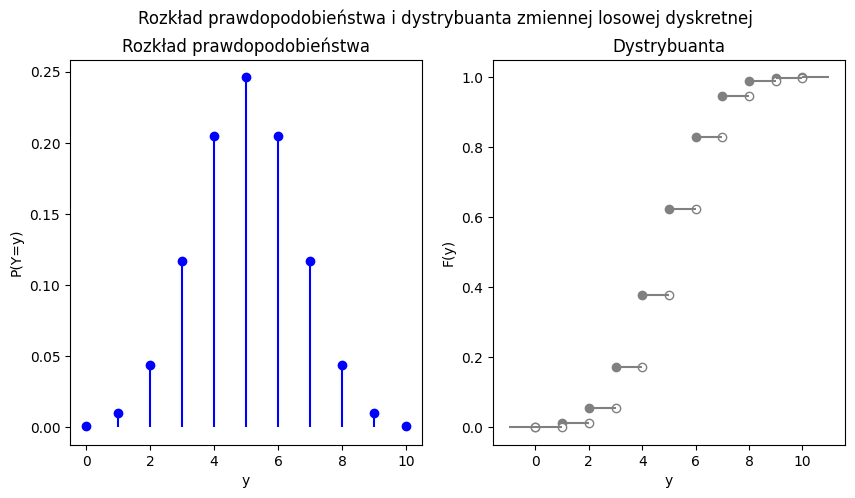

In [26]:
vizualize_discrete_distribution(r2p, r2f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Y - wartość średnia (`r2_mean`), wariancja(`r2_var`) i odchylenie standardowe (`r2_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [27]:
r2_mean = binom.mean(n, p)

In [28]:
r2_var = binom.var(n, p)

In [29]:
r2_std = binom.std(n, p) 

In [30]:
# Komórka testowa
assert np.isclose(r2_mean, 5.0)
assert np.isclose(r2_var, 2.5)
assert np.isclose(r2_std, 1.5811388300841898)

### Zadanie 3: Rozkład Poissona [10 pkt]

Zmienna losowa Z ma rozkład Poissona z parametrem $\lambda=15$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Z w formie tablicy `r3p` o następującej strukturze:

> Indeks:</br>
> z - warianty przyjmowane przez zmienną Z.</br>

> Kolumny:</br>
> P(Z=z) - prawdopodobieństwo poszczególnych wariantów.

W tablicy zawrzyj tylko warianty zmiennej losowej Z od 0 do wartości przy której suma prawdopodobieństw uwzględnionych wariantów przekracza 0.9999.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
l = 15
z_values = []
probabilities = []
sum_p = 0
z = 0
while sum_p <= 0.9999:
    p = poisson.pmf(z, l)
    z_values.append(z)
    probabilities.append(p)
    sum_p += p
    z += 1
r3p = pd.DataFrame(data=probabilities, index=z_values, columns=["P(Z=z)"])
r3p.index.name = "z"
r3p


,P(Z=z)
z,
0,3.059023e-07
1,4.588535e-06
2,3.441401e-05
3,1.720701e-04
4,6.452627e-04
5,1.935788e-03
6,4.839470e-03
7,1.037029e-02
8,1.944430e-02


In [32]:
# Komórka testowa
assert type(r3p) == pd.DataFrame
assert r3p.shape == (32, 1)
assert list(r3p.columns) == ["P(Z=z)"]
assert r3p.index.name == "z"
assert np.isclose(np.sum(r3p.index.values), 496)
assert np.isclose(np.sum(r3p["P(Z=z)"]), 0.9999)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Z w formie tablicy `r3f` o następującej strukturze:

> Indeks:</br>
> z - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(z) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [33]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
l = 15
z_values = []
probabilities = []
sum_p = 0
z = 0
while sum_p <= 0.9999:
    p = poisson.pmf(z, l)
    z_values.append(z)
    probabilities.append(p)
    sum_p += p
    z += 1
r3p = pd.DataFrame(data=probabilities, index=z_values, columns=["P(Z=z)"])
r3p.index.name = "z"
breaks = np.hstack([-np.inf, r3p.index + 1, np.inf])
r_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
cdf_values = np.cumsum(r3p["P(Z=z)"].values)
cdf_values = np.hstack([0, cdf_values])
r3f = pd.DataFrame(data=cdf_values, index=r_intervals, columns=["F(z)"])
r3f.index.name = "z"
r3f


,F(z)
z,
"[-inf, 1.0)",0.000000e+00
"[1.0, 2.0)",3.059023e-07
"[2.0, 3.0)",4.894437e-06
"[3.0, 4.0)",3.930845e-05
"[4.0, 5.0)",2.113785e-04
"[5.0, 6.0)",8.566412e-04
"[6.0, 7.0)",2.792429e-03
"[7.0, 8.0)",7.631900e-03
"[8.0, 9.0)",1.800219e-02


In [34]:
# Komórka testowa
assert type(r3f) == pd.DataFrame
assert r3f.shape == (33, 1)
assert list(r3f.columns) == ["F(z)"]
assert r3f.index.name == "z"
assert type(r3f.index) == pd.core.indexes.interval.IntervalIndex
assert r3f.index.closed == 'left'
assert np.isclose(r3f["F(z)"].min(), 0.0)
assert np.isclose(r3f["F(z)"].max(), 0.9999)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Z w formie wykresów.

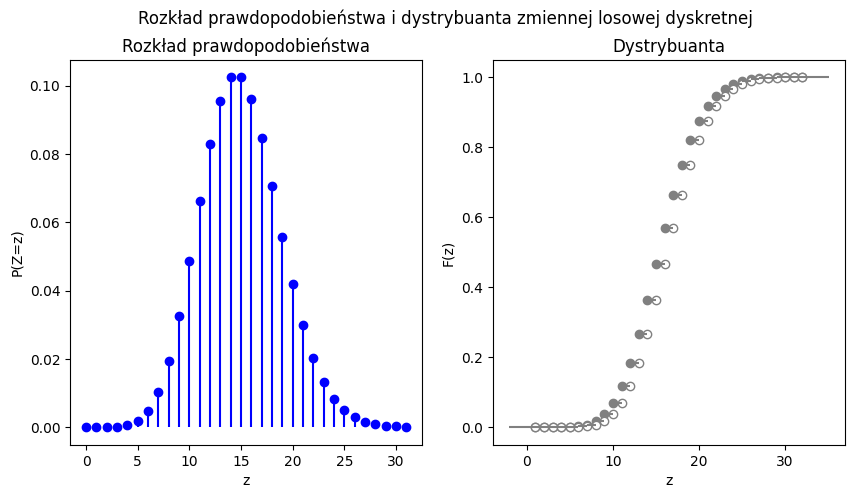

In [35]:
vizualize_discrete_distribution(r3p, r3f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Z - wartość średnia (`r3_mean`), wariancja(`r3_var`) i odchylenie standardowe (`r3_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [36]:
r3_mean = poisson.mean(l)

In [37]:
r3_var = poisson.var(l)

In [38]:
r3_std = poisson.std(l) 

In [39]:
# Komórka testowa
assert np.isclose(r3_mean, 15.0)
assert np.isclose(r3_var, 15.0)
assert np.isclose(r3_std, 3.872983346207417)

### Zadanie 4: Obliczanie i wizualizacja prawdopodobieństw [6 pkt]

Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>5)
- P(1<Y<=6)
- P(Z<=12 | Z>21)

Wyniki zapisz kolejno do zmiennych `p1`, `p2` i `p3` oraz przedstaw na wykresach korzystając z funkcji `vizualize_discrete_distribution()`.

#### a) P(X>5)

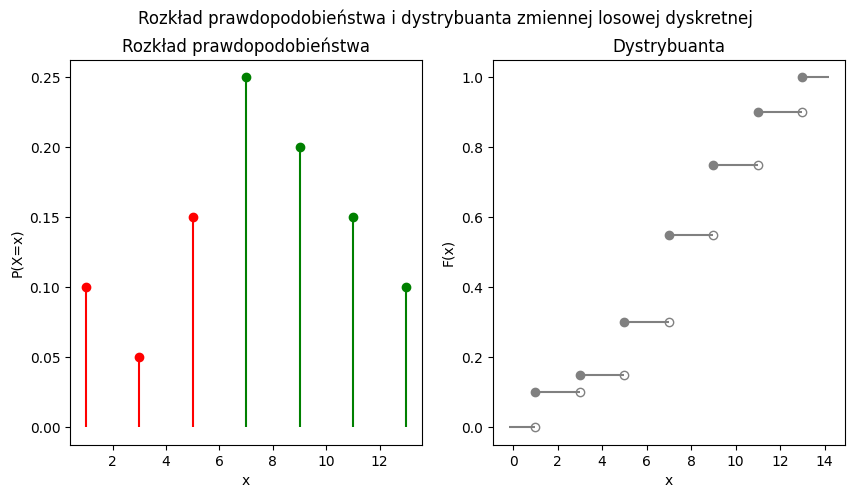

In [40]:
a=r1p.index>5
pa =  r1p["P(X=x)"].values[a]
p1=pa.sum()
vizualize_discrete_distribution(r1p,r1f, a)

In [41]:
# Komórka testowa
assert np.isclose(p1, 0.7)

#### b) P(1<Y<=6)

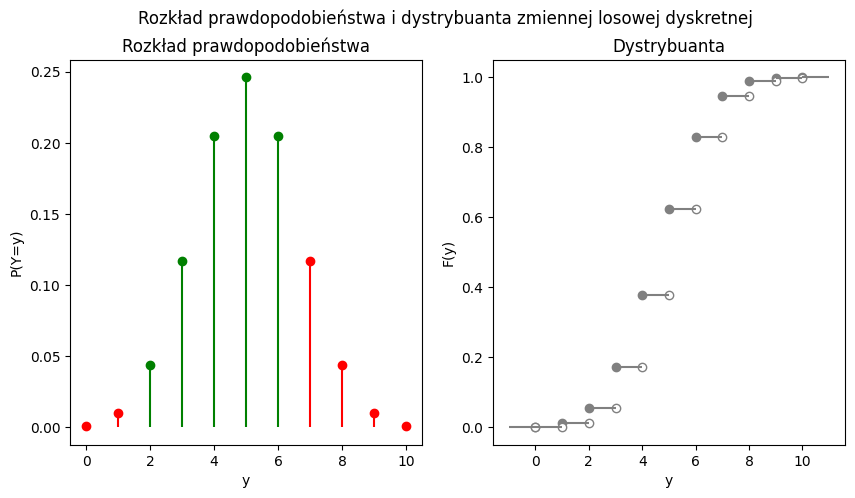

In [42]:
b= np.logical_and(r2p.index>1, r2p.index<=6)
pb =  r2p["P(Y=y)"].values[b]
p2=pb.sum()
vizualize_discrete_distribution(r2p, r2f, b)

In [43]:
# Komórka testowa
assert np.isclose(p2, 0.8173828125)

#### c) P(Z<=12 | Z>21)

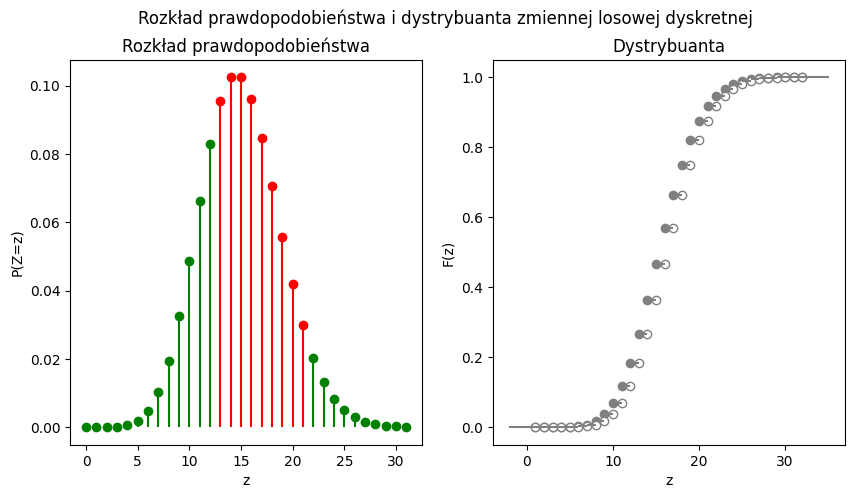

In [44]:
c = np.logical_or(r3p.index>21, r3p.index<=12)
p3= sp.stats.poisson.cdf(12, 15) +(1- sp.stats.poisson.cdf(21, 15))

vizualize_discrete_distribution(r3p, r3f, c)

In [45]:
# Komórka testowa
assert np.isclose(p3, 0.32071743985184814)